In [5]:
import xarray as xr
import matplotlib.pyplot as plt

In [6]:
filename = 'baseline-chirps-1981-2019.nc'
ds = xr.open_dataset(filename)

In [8]:
time = ds['time']
lat = ds['lat']
lon = ds['lon']
precip = ds['precip']

In [10]:
precip

<xarray.DataArray 'precip' (time: 13969, lat: 50, lon: 50)> Size: 140MB
[34922500 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 112kB 1981-01-01 1981-01-02 ... 2019-03-31
  * lat      (lat) int64 400B -39 -38 -37 -36 -35 -34 -33 -32 ... 4 5 6 7 8 9 10
  * lon      (lon) int64 400B -84 -83 -82 -81 -80 -79 ... -39 -38 -37 -36 -35
Attributes:
    standard_name:       convective precipitation rate
    long_name:           Climate Hazards group InfraRed Precipitation with St...
    units:               mm/day
    time_step:           day
    geostatial_lat_min:  -50.0
    geostatial_lat_max:  50.0
    geostatial_lon_min:  -180.0
    geostatial_lon_max:  180.0

In [12]:
print("Time range:", time.min().values, "to", time.max().values)
print("Latitude range:", lat.min().values, "to", lat.max().values)
print("Longitude range:", lon.min().values, "to", lon.max().values)
print("Precipitation statistics:")
print("Mean:", precip.mean().values)
print("Standard Deviation:", precip.std().values)
print("Min:", precip.min().values)
print("Max:", precip.max().values)
print("25th percentile:", precip.quantile(0.25).values)
print("Median:", precip.median().values)
print("75th percentile:", precip.quantile(0.75).values)

Time range: 1981-01-01T00:00:00.000000000 to 2019-03-31T00:00:00.000000000
Latitude range: -39 to 10
Longitude range: -84 to -35
Precipitation statistics:
Mean: 2.496597
Standard Deviation: 7.170901
Min: 0.0
Max: 907.46436
25th percentile: 0.0
Median: 0.0
75th percentile: 0.0


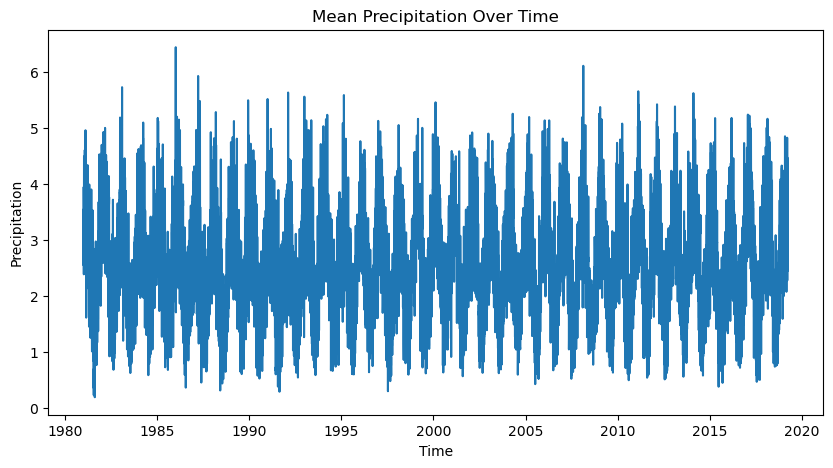

In [13]:
mean_precip_time = precip.mean(dim=['lat', 'lon'])

plt.figure(figsize=(10, 5))
mean_precip_time.plot()
plt.title('Mean Precipitation Over Time')
plt.xlabel('Time')
plt.ylabel('Precipitation')
plt.show()

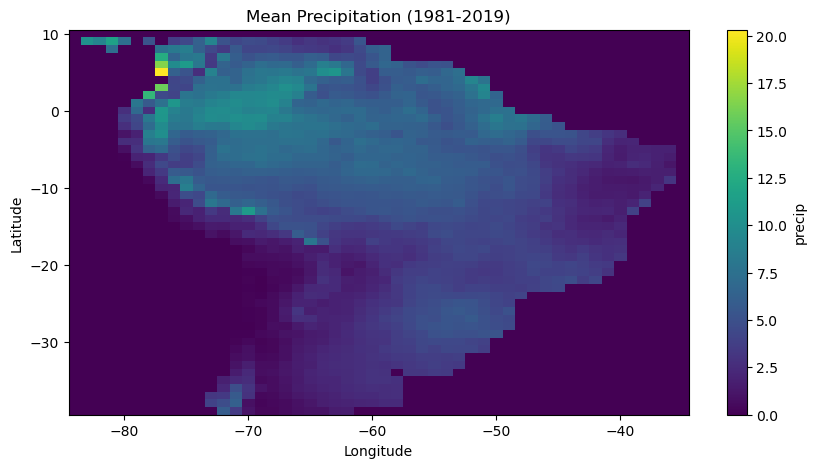

In [14]:
mean_precip_spatial = precip.mean(dim='time')

plt.figure(figsize=(10, 5))
mean_precip_spatial.plot()
plt.title('Mean Precipitation (1981-2019)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

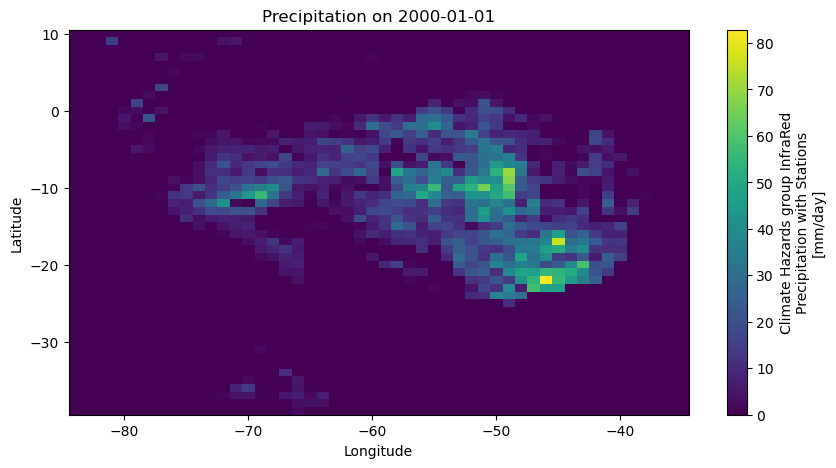

In [15]:
time_slice = '2000-01-01'
precip_time_slice = precip.sel(time=time_slice)

plt.figure(figsize=(10, 5))
precip_time_slice.plot()
plt.title(f'Precipitation on {time_slice}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [17]:
missing_time = time.isnull().sum().item()
missing_lat = lat.isnull().sum().item()
missing_lon = lon.isnull().sum().item()
missing_precip = precip.isnull().sum().item()

print(f"Missing values in time: {missing_time}")
print(f"Missing values in latitude: {missing_lat}")
print(f"Missing values in longitude: {missing_lon}")
print(f"Missing values in precipitation: {missing_precip}")

Missing values in time: 0
Missing values in latitude: 0
Missing values in longitude: 0
Missing values in precipitation: 0
